In [1]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/FFT-alexNet0330-6.h5')
import scipy.io
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def data_geneter_test():
    def load_data_from_mat(path):

        test_data = []
        test_labels = []

        for file in os.listdir(path):
            if file.startswith('test_'):
                mat = scipy.io.loadmat(os.path.join(path, file))
                test_data.append(mat[list(mat.keys())[-2]])
                test_labels.append(mat[list(mat.keys())[-1]])

        # Concatenate all data and labels respectively
        test_data = np.concatenate(test_data, axis=0)
        test_labels = np.concatenate(test_labels, axis=0)

        # Normalize data
        test_data = test_data.astype('float32') / 255

        # Convert labels to categorical (one-hot encoding)
        test_labels = to_categorical(test_labels, 10)

        return test_data, test_labels

    def apply_fft_and_split(data):
        """
        对数据执行一维FFT变换，并分离实部和虚部。
        
        Parameters:
        - data: 形状为 (n_samples, n_features) 的数组
        
        Returns:
        - FFT变换后数据的实部和虚部
        """
        fft_data = np.fft.fft(data, axis=-1)
        return np.real(fft_data), np.imag(fft_data)

    # 调用函数加载数据
    path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
    test_data, test_labels = load_data_from_mat(path)


    # 应用FFT变换并分离实部和虚部
    test_data_fft_real, test_data_fft_imag = apply_fft_and_split(test_data)

    def compute_magnitude_phase(data_fft_real, data_fft_imag):
        magnitude = np.sqrt(data_fft_real**2 + data_fft_imag**2)
        phase = np.arctan2(data_fft_imag, data_fft_real)
        return magnitude, phase

    # 假设 train_data_fft_real 和 train_data_fft_imag 是你之前计算的FFT变换的实部和虚部
    test_magnitude, test_phase = compute_magnitude_phase(test_data_fft_real, test_data_fft_imag)


    half_test_magnitude = test_magnitude[:, :1536]
    half_test_data_fft_real = test_data_fft_real[:, :1536]
    half_test_data_fft_imag = test_data_fft_imag[:, :1536]

    # 然后可以用这些数据来训练你的模型

    test_data_combined = np.concatenate((half_test_magnitude, half_test_data_fft_real, half_test_data_fft_imag), axis=-1)

    print(test_data_combined.shape)

    test_data_fft_reshaped = test_data_combined.reshape((-1, 32, 48, 3))

    return test_data_fft_reshaped, test_labels

def data_geneter_test_specific(dNumber):
    def load_data_from_mat(path):

        test_data = []
        test_labels = []

        for file in os.listdir(path):
            if file.startswith(f'test_{dNumber}'):
                mat = scipy.io.loadmat(os.path.join(path, file))
                test_data.append(mat[list(mat.keys())[-2]])
                test_labels.append(mat[list(mat.keys())[-1]])

        # Concatenate all data and labels respectively
        test_data = np.concatenate(test_data, axis=0)
        test_labels = np.concatenate(test_labels, axis=0)

        # Normalize data
        test_data = test_data.astype('float32') / 255

        # Convert labels to categorical (one-hot encoding)
        test_labels = to_categorical(test_labels, 10)

        return test_data, test_labels

    def apply_fft_and_split(data):
        """
        对数据执行一维FFT变换，并分离实部和虚部。
        
        Parameters:
        - data: 形状为 (n_samples, n_features) 的数组
        
        Returns:
        - FFT变换后数据的实部和虚部
        """
        fft_data = np.fft.fft(data, axis=-1)
        return np.real(fft_data), np.imag(fft_data)

    # 调用函数加载数据
    path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
    test_data, test_labels = load_data_from_mat(path)


    # 应用FFT变换并分离实部和虚部
    test_data_fft_real, test_data_fft_imag = apply_fft_and_split(test_data)

    def compute_magnitude_phase(data_fft_real, data_fft_imag):
        magnitude = np.sqrt(data_fft_real**2 + data_fft_imag**2)
        phase = np.arctan2(data_fft_imag, data_fft_real)
        return magnitude, phase

    # 假设 train_data_fft_real 和 train_data_fft_imag 是你之前计算的FFT变换的实部和虚部
    test_magnitude, test_phase = compute_magnitude_phase(test_data_fft_real, test_data_fft_imag)


    half_test_magnitude = test_magnitude[:, :1536]
    half_test_data_fft_real = test_data_fft_real[:, :1536]
    half_test_data_fft_imag = test_data_fft_imag[:, :1536]

    # 然后可以用这些数据来训练你的模型

    test_data_combined = np.concatenate((half_test_magnitude, half_test_data_fft_real, half_test_data_fft_imag), axis=-1)

    print(test_data_combined.shape)

    test_data_fft_reshaped = test_data_combined.reshape((-1, 32, 48, 3))

    return test_data_fft_reshaped, test_labels



(12000, 4608)
375/375 - 9s - 23ms/step - accuracy: 0.8334 - loss: 0.9528

Test accuracy: 0.8334166407585144
Test loss: 0.9527531862258911
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1200
           1       1.00      1.00      1.00      1200
           2       0.92      0.93      0.93      1200
           3       0.94      0.90      0.92      1200
           4       1.00      1.00      1.00      1200
           5       1.00      0.93      0.96      1200
           6       0.75      0.54      0.63      1200
           7       1.00      1.00      1.00      1200
           8       0.59      0.65      0.62      1200
           9       0.59      0.55      0.57      1200

    accuracy                           0.83     12000
   macro avg       0.84      0.83      0.83     12000
weighted avg       0.84      0.83      0.83     12000



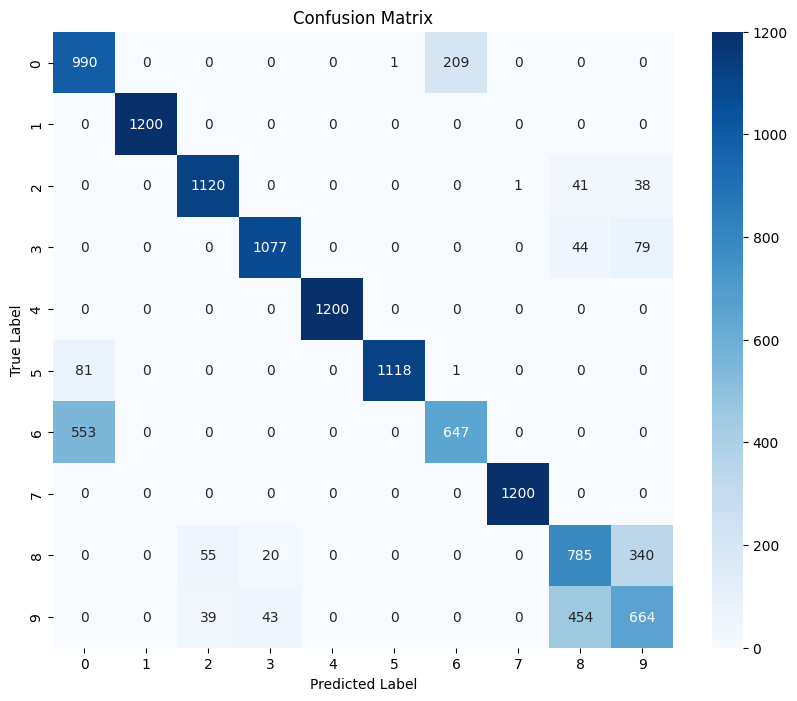

In [2]:
test_data_fft_reshaped, test_labels = data_geneter_test()
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(2000, 4608)
63/63 - 2s - 27ms/step - accuracy: 0.7670 - loss: 1.0683

Test accuracy: 0.7670000195503235
Test loss: 1.068272590637207
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       200
           1       1.00      1.00      1.00       200
           2       0.82      0.83      0.82       200
           3       0.85      0.78      0.81       200
           4       1.00      1.00      1.00       200
           5       0.99      0.81      0.89       200
           6       0.74      0.52      0.61       200
           7       1.00      1.00      1.00       200
           8       0.43      0.41      0.42       200
           9       0.46      0.50      0.48       200

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



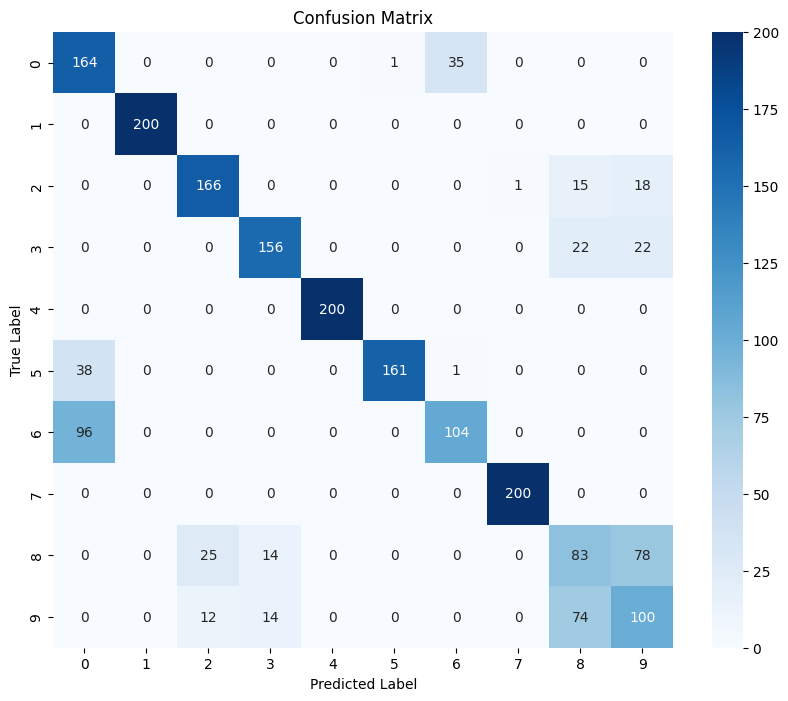

In [3]:
dNumber = 5
test_data_fft_reshaped, test_labels = data_geneter_test_specific(dNumber)
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(2000, 4608)
63/63 - 2s - 27ms/step - accuracy: 0.8080 - loss: 1.0410

Test accuracy: 0.8080000281333923
Test loss: 1.0409969091415405
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

           0       0.56      0.83      0.67       200
           1       1.00      1.00      1.00       200
           2       0.93      0.94      0.93       200
           3       0.91      0.87      0.89       200
           4       1.00      1.00      1.00       200
           5       1.00      0.85      0.92       200
           6       0.74      0.49      0.59       200
           7       1.00      1.00      1.00       200
           8       0.54      0.57      0.56       200
           9       0.53      0.53      0.53       200

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



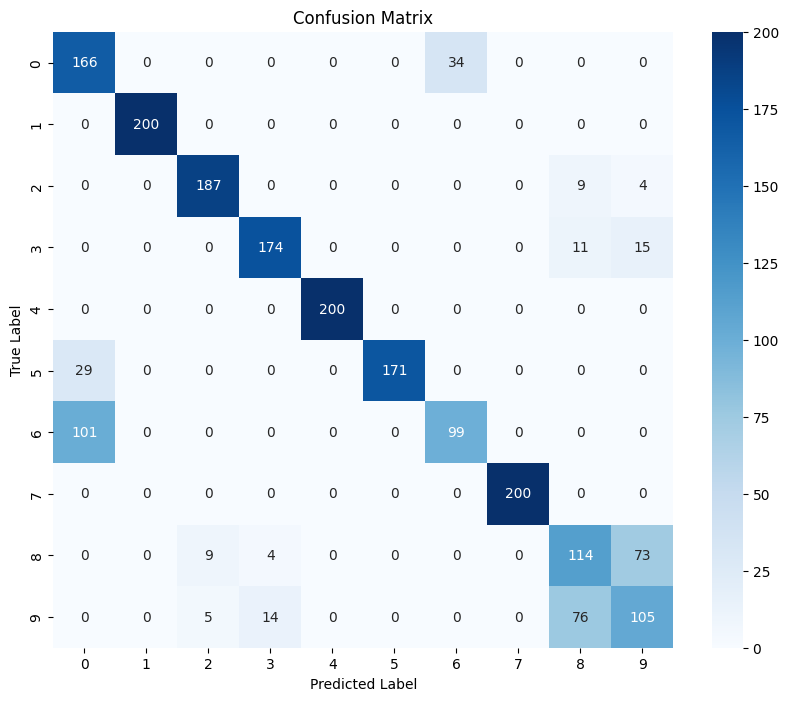

In [4]:
dNumber = 10
test_data_fft_reshaped, test_labels = data_geneter_test_specific(dNumber)
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(2000, 4608)
63/63 - 2s - 24ms/step - accuracy: 0.8350 - loss: 1.0476

Test accuracy: 0.8349999785423279
Test loss: 1.0476045608520508
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       200
           1       1.00      1.00      1.00       200
           2       0.93      0.96      0.95       200
           3       0.96      0.88      0.92       200
           4       1.00      1.00      1.00       200
           5       1.00      0.95      0.98       200
           6       0.77      0.48      0.59       200
           7       1.00      1.00      1.00       200
           8       0.60      0.68      0.64       200
           9       0.58      0.54      0.56       200

    accuracy                           0.83      2000
   macro avg       0.85      0.83      0.83      2000
weighted avg       0.85      0.83      0.83      2000



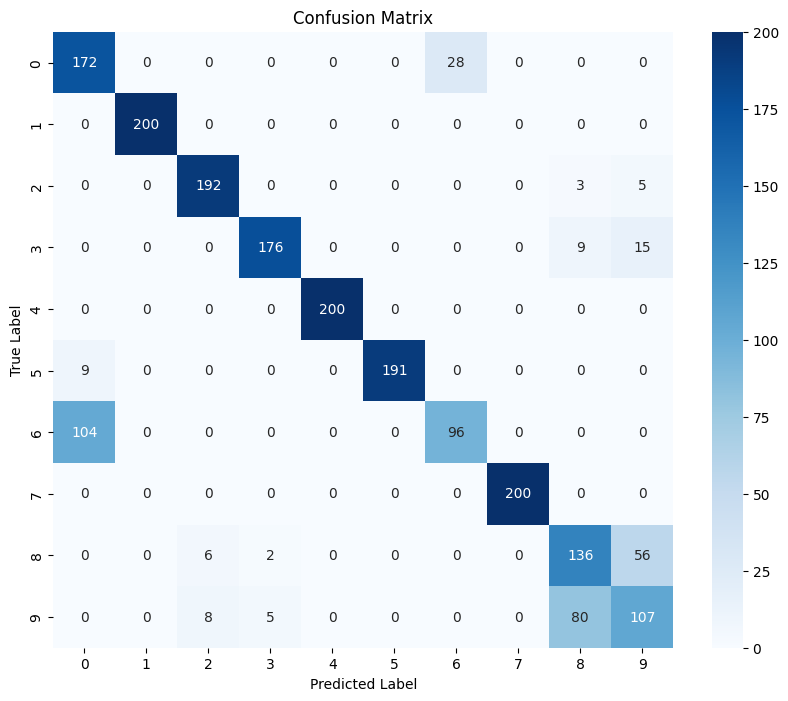

In [5]:
dNumber = 15
test_data_fft_reshaped, test_labels = data_geneter_test_specific(dNumber)
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(2000, 4608)
63/63 - 2s - 26ms/step - accuracy: 0.8585 - loss: 0.9286

Test accuracy: 0.8585000038146973
Test loss: 0.9285549521446228
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       200
           1       1.00      1.00      1.00       200
           2       0.93      0.96      0.95       200
           3       0.99      0.93      0.96       200
           4       1.00      1.00      1.00       200
           5       1.00      0.98      0.99       200
           6       0.77      0.57      0.66       200
           7       1.00      1.00      1.00       200
           8       0.64      0.74      0.69       200
           9       0.66      0.57      0.61       200

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



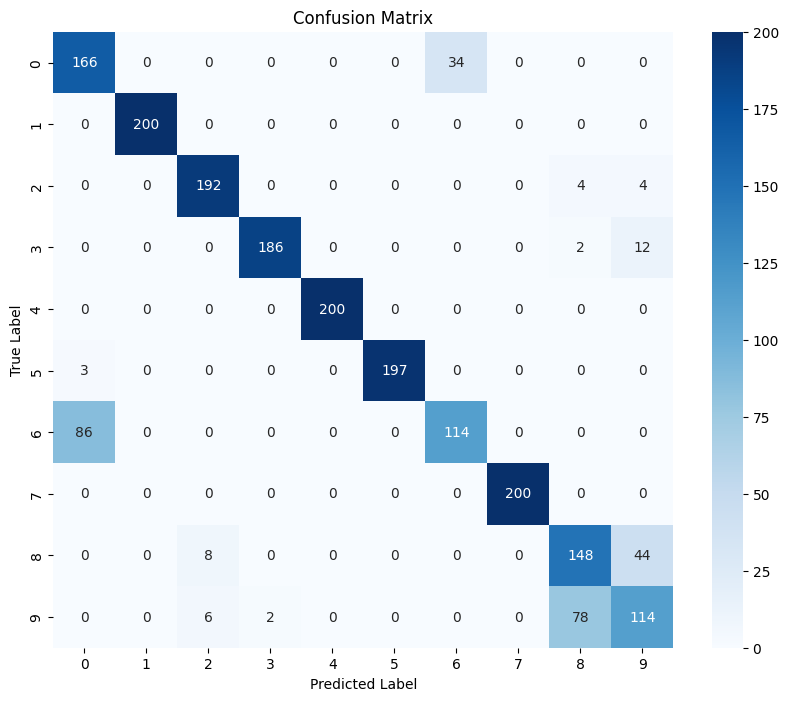

In [6]:
dNumber = 20
test_data_fft_reshaped, test_labels = data_geneter_test_specific(dNumber)
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(2000, 4608)
63/63 - 2s - 24ms/step - accuracy: 0.8625 - loss: 0.8778

Test accuracy: 0.862500011920929
Test loss: 0.8778024315834045
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       200
           1       1.00      1.00      1.00       200
           2       0.96      0.96      0.96       200
           3       0.98      0.96      0.97       200
           4       1.00      1.00      1.00       200
           5       1.00      0.99      1.00       200
           6       0.75      0.57      0.65       200
           7       1.00      1.00      1.00       200
           8       0.65      0.74      0.69       200
           9       0.67      0.58      0.62       200

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



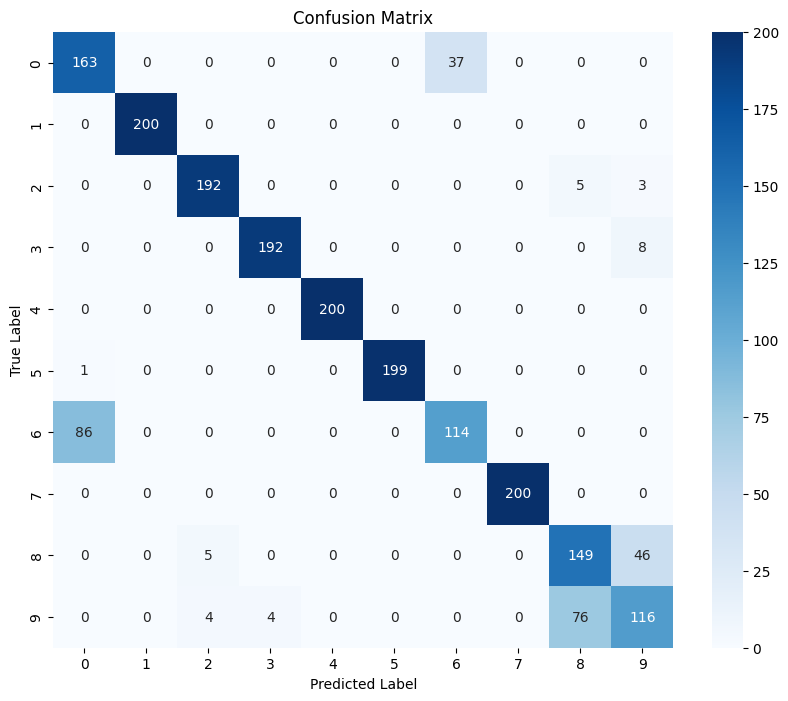

In [8]:
dNumber = 25
test_data_fft_reshaped, test_labels = data_geneter_test_specific(dNumber)
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(2000, 4608)
63/63 - 2s - 28ms/step - accuracy: 0.8695 - loss: 0.8302

Test accuracy: 0.8694999814033508
Test loss: 0.8302007913589478
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       200
           1       1.00      1.00      1.00       200
           2       0.97      0.95      0.96       200
           3       0.98      0.96      0.97       200
           4       1.00      1.00      1.00       200
           5       1.00      0.99      1.00       200
           6       0.75      0.60      0.66       200
           7       1.00      1.00      1.00       200
           8       0.67      0.78      0.72       200
           9       0.69      0.61      0.65       200

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



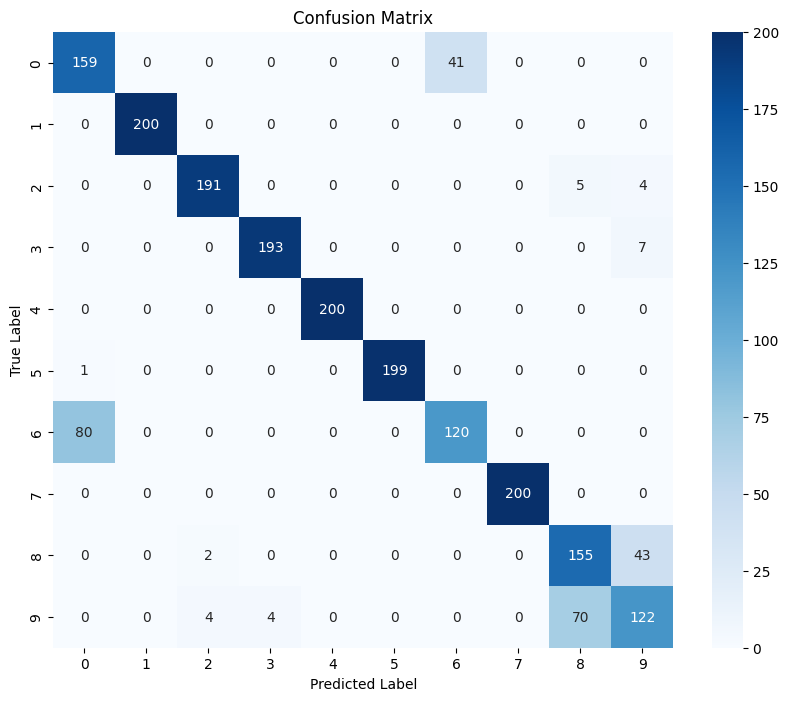

In [10]:
dNumber = 30
test_data_fft_reshaped, test_labels = data_geneter_test_specific(dNumber)
# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_fft_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# 评估模型在测试集上的性能
print(f'Test loss: {test_loss}')

# 预测测试数据集
predictions = loaded_model.predict(test_data_fft_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Train data shape: (108000, 3072)
Train labels shape: (108000, 10)
Test data shape: (12000, 3072)
Test labels shape: (12000, 10)
375/375 - 5s - 12ms/step - accuracy: 0.8102 - loss: 0.9597
测试集损失: 0.9597095251083374
测试集准确率: 0.8102499842643738
375/375 - 5s - 12ms/step - accuracy: 0.8102 - loss: 0.9597

Test accuracy: 0.8102499842643738
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1200
           1       1.00      1.00      1.00      1200
           2       0.87      0.94      0.90      1200
           3       0.86      0.93      0.89      1200
           4       1.00      1.00      1.00      1200
           5       0.95      0.90      0.92      1200
           6       0.78      0.63      0.70      1200
           7       1.00      1.00      1.00      1200
           8       0.48      0.49      0.48      1200
           9       0.55      0.45      0.49      1200

    accuracy                

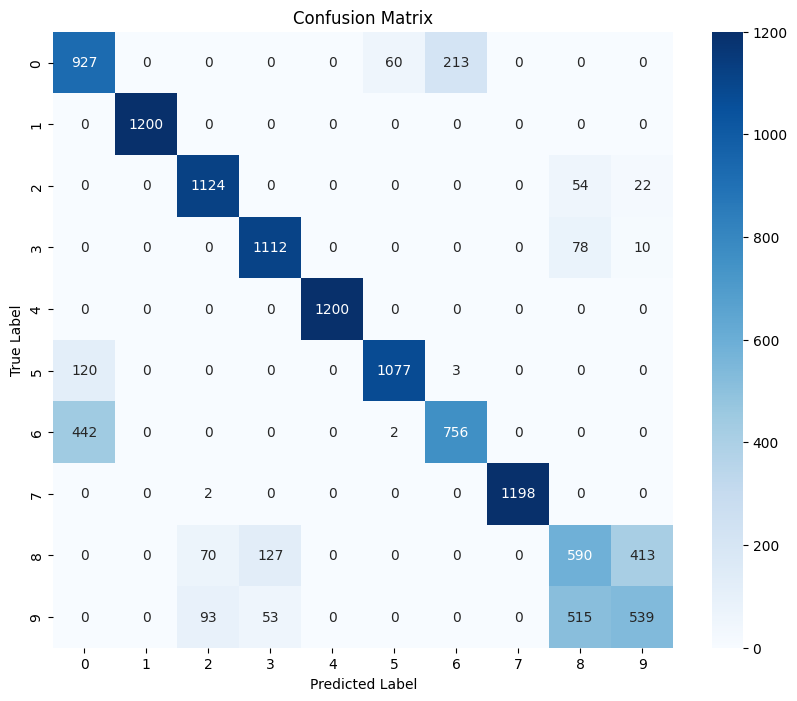

In [4]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)


63/63 - 2s - 28ms/step - accuracy: 0.7960 - loss: 1.0935
测试集损失: 1.093481183052063
测试集准确率: 0.7960000038146973
63/63 - 2s - 24ms/step - accuracy: 0.7960 - loss: 1.0935

Test accuracy: 0.7960000038146973
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       200
           1       1.00      1.00      1.00       200
           2       0.81      0.90      0.85       200
           3       0.86      0.89      0.87       200
           4       1.00      1.00      1.00       200
           5       0.92      0.88      0.90       200
           6       0.77      0.64      0.69       200
           7       1.00      0.99      0.99       200
           8       0.46      0.51      0.48       200
           9       0.54      0.41      0.47       200

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.79      2000
weighted avg       0.80      0.80      0.79      2000



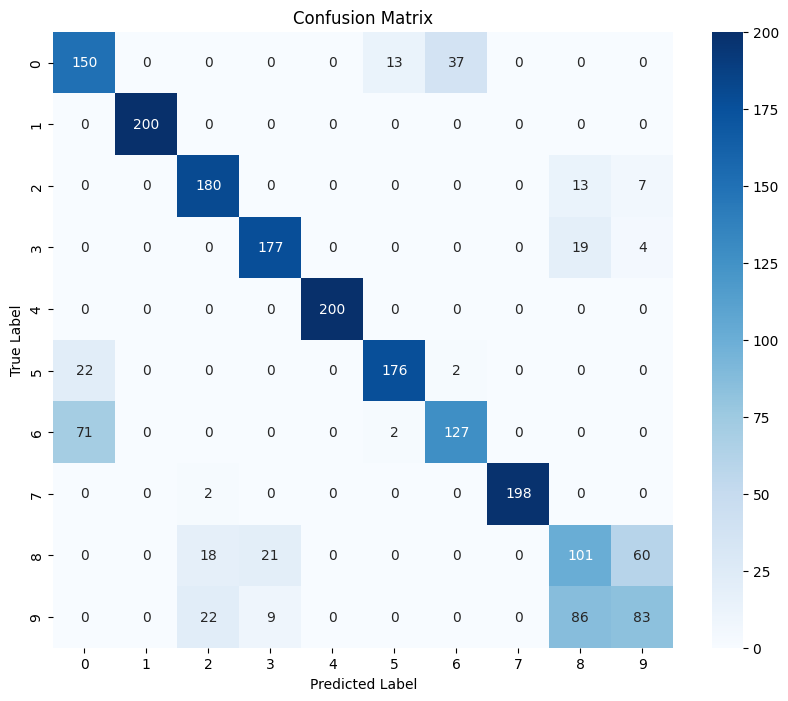

In [11]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_5'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)


63/63 - 2s - 25ms/step - accuracy: 0.8010 - loss: 0.9653
测试集损失: 0.965336263179779
测试集准确率: 0.8009999990463257
63/63 - 2s - 24ms/step - accuracy: 0.8010 - loss: 0.9653

Test accuracy: 0.8009999990463257
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
              precision    recall  f1-score   support

           0       0.60      0.77      0.67       200
           1       1.00      1.00      1.00       200
           2       0.87      0.93      0.90       200
           3       0.87      0.92      0.90       200
           4       1.00      1.00      1.00       200
           5       0.95      0.87      0.91       200
           6       0.77      0.61      0.68       200
           7       1.00      1.00      1.00       200
           8       0.46      0.48      0.47       200
           9       0.53      0.43      0.48       200

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



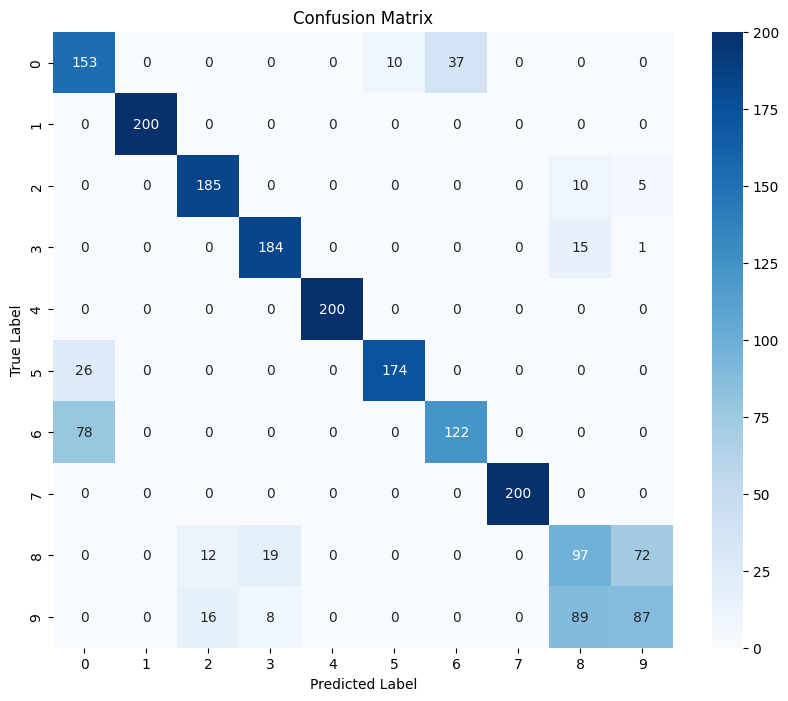

In [12]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_10'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)


63/63 - 2s - 26ms/step - accuracy: 0.8130 - loss: 0.9652
测试集损失: 0.9652238488197327
测试集准确率: 0.8130000233650208
63/63 - 1s - 21ms/step - accuracy: 0.8130 - loss: 0.9652

Test accuracy: 0.8130000233650208
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       200
           1       1.00      1.00      1.00       200
           2       0.87      0.94      0.90       200
           3       0.87      0.93      0.90       200
           4       1.00      1.00      1.00       200
           5       0.95      0.91      0.93       200
           6       0.78      0.64      0.70       200
           7       1.00      1.00      1.00       200
           8       0.48      0.50      0.49       200
           9       0.55      0.45      0.49       200

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000


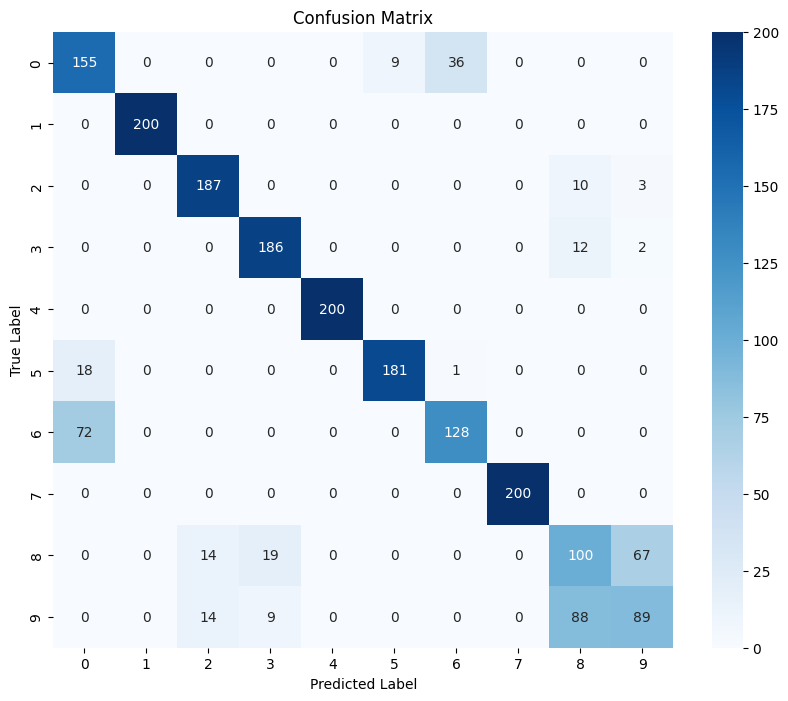

In [13]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_15'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 1s - 21ms/step - accuracy: 0.8160 - loss: 0.9482
测试集损失: 0.9482157230377197
测试集准确率: 0.8159999847412109
63/63 - 1s - 20ms/step - accuracy: 0.8160 - loss: 0.9482

Test accuracy: 0.8159999847412109
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       200
           1       1.00      1.00      1.00       200
           2       0.89      0.96      0.93       200
           3       0.86      0.95      0.90       200
           4       1.00      1.00      1.00       200
           5       0.94      0.92      0.93       200
           6       0.78      0.62      0.69       200
           7       1.00      1.00      1.00       200
           8       0.49      0.48      0.49       200
           9       0.55      0.46      0.50       200

    accuracy                           0.82      2000
   macro avg       0.81      0.82      0.81     

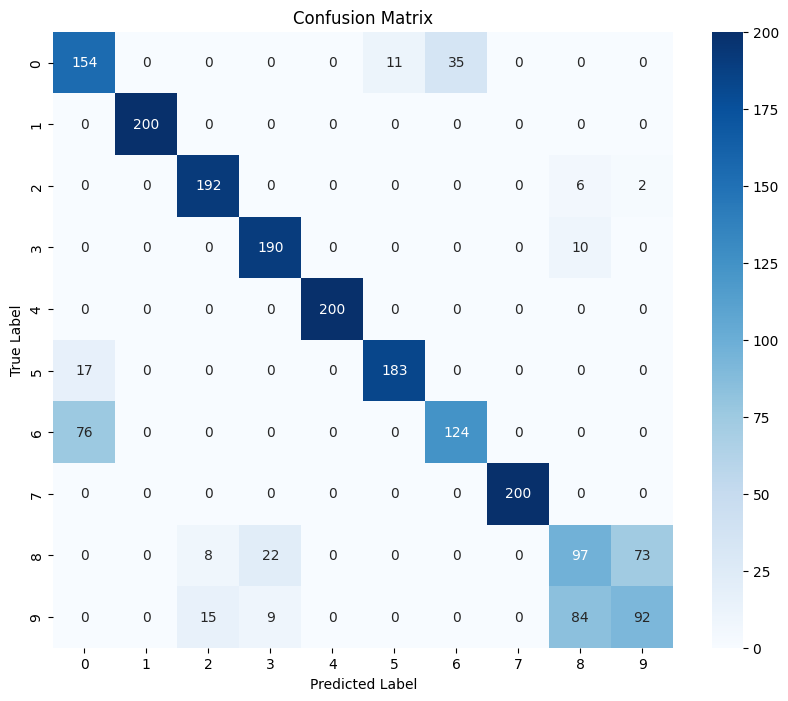

In [14]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_20'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)


63/63 - 2s - 26ms/step - accuracy: 0.8165 - loss: 0.9456
测试集损失: 0.9456032514572144
测试集准确率: 0.8165000081062317
63/63 - 1s - 22ms/step - accuracy: 0.8165 - loss: 0.9456

Test accuracy: 0.8165000081062317
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       200
           1       1.00      1.00      1.00       200
           2       0.90      0.95      0.93       200
           3       0.85      0.93      0.89       200
           4       1.00      1.00      1.00       200
           5       0.95      0.91      0.93       200
           6       0.79      0.64      0.70       200
           7       1.00      1.00      1.00       200
           8       0.48      0.48      0.48       200
           9       0.56      0.47      0.51       200

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.81      2000
weighted avg       0.82      0.82      0.81      2000


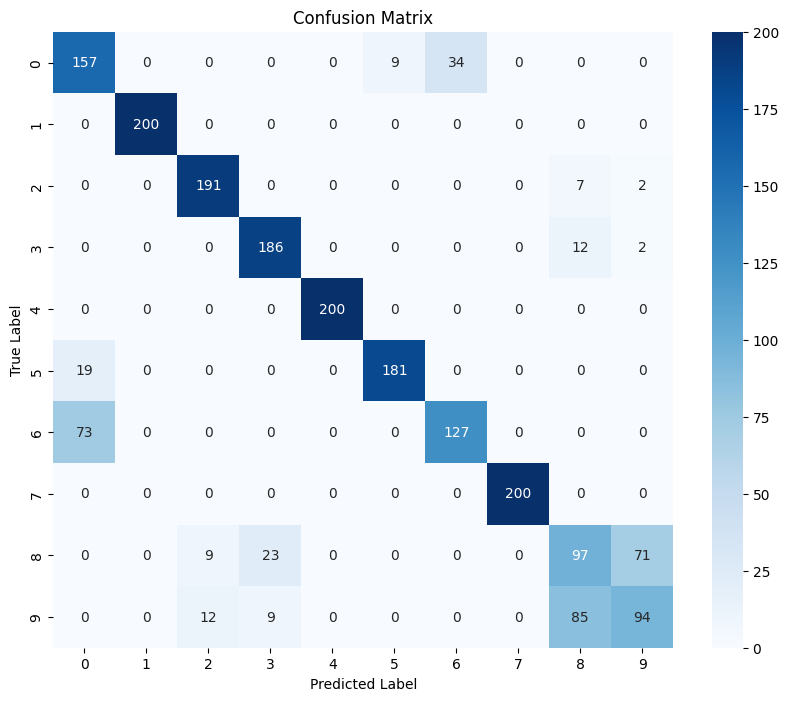

In [15]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_25'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 2s - 27ms/step - accuracy: 0.8190 - loss: 0.9526
测试集损失: 0.9526365399360657
测试集准确率: 0.8190000057220459
63/63 - 1s - 20ms/step - accuracy: 0.8190 - loss: 0.9526

Test accuracy: 0.8190000057220459
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       200
           1       1.00      1.00      1.00       200
           2       0.89      0.94      0.92       200
           3       0.86      0.94      0.90       200
           4       1.00      1.00      1.00       200
           5       0.96      0.91      0.93       200
           6       0.79      0.64      0.71       200
           7       1.00      1.00      1.00       200
           8       0.49      0.49      0.49       200
           9       0.56      0.47      0.51       200

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82     

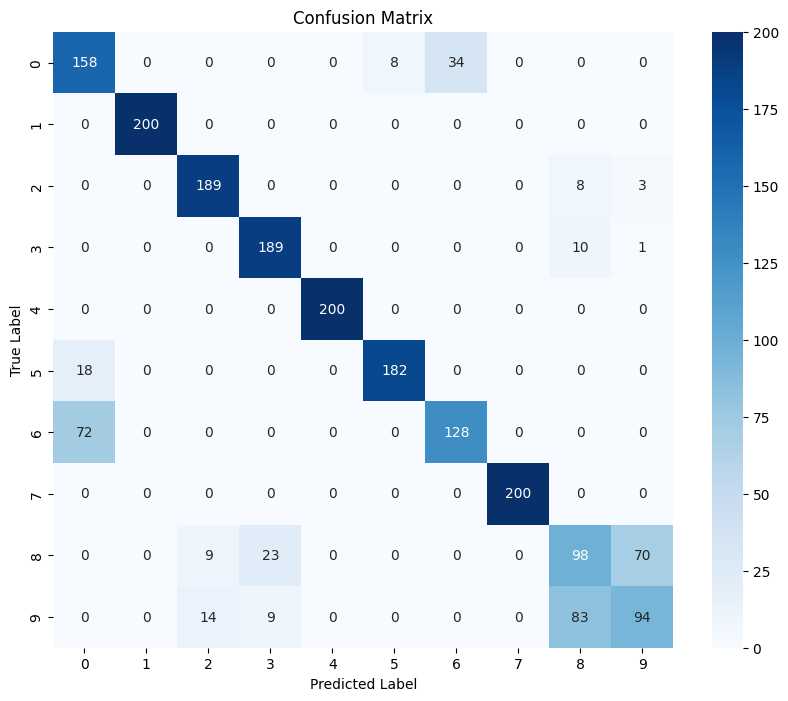

In [16]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_30'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/alexNet0328-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

